In [100]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

In [101]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing import image

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

    

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [102]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [103]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [104]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert true labels to class labels

In [105]:
cm = confusion_matrix(y_true_classes, y_pred_classes)

In [106]:
def predict_brain_tumor_type(image_path):
    """Predicts the brain tumor type for a given image.

    Args:
        image_path: Path to the image file.

    Returns:
        A tuple containing the predicted class label and probability.
    """
    img = image.load_img(image_path, target_size=(150, 150))  # Load and resize image
    img_array = image.img_to_array(img)  # Convert to NumPy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model.predict(img_array)  # Make prediction
    predicted_class_index = prediction.argmax()  # Get predicted class index
    predicted_class_label = labels[predicted_class_index]  # Get class label
    predicted_probability = prediction[0][predicted_class_index]  # Get probability

    return predicted_class_label, predicted_probability

In [107]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert true labels to class labels


In [108]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [109]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [111]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [112]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [113]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 71, 71, 64)        36928     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 69, 69, 64)        36928     
_________________________________________________________________
dropout_13 (Dropout)         (None, 69, 69, 64)       

In [114]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [115]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.1)

Epoch 1/30
83/83 [==============================] - 4s 46ms/step - loss: 2.4107 - accuracy: 0.2770 - val_loss: 1.3609 - val_accuracy: 0.3265
Epoch 2/30
83/83 [==============================] - 3s 39ms/step - loss: 1.1924 - accuracy: 0.4465 - val_loss: 0.9671 - val_accuracy: 0.6293
Epoch 3/30
83/83 [==============================] - 3s 39ms/step - loss: 0.9408 - accuracy: 0.5853 - val_loss: 0.8244 - val_accuracy: 0.7177
Epoch 4/30
83/83 [==============================] - 3s 40ms/step - loss: 0.8171 - accuracy: 0.6572 - val_loss: 0.7479 - val_accuracy: 0.6905
Epoch 5/30
83/83 [==============================] - 3s 40ms/step - loss: 0.6968 - accuracy: 0.7166 - val_loss: 0.6939 - val_accuracy: 0.7347
Epoch 6/30
83/83 [==============================] - 3s 40ms/step - loss: 0.5958 - accuracy: 0.7541 - val_loss: 0.6576 - val_accuracy: 0.7211
Epoch 7/30
83/83 [==============================] - 3s 39ms/step - loss: 0.5139 - accuracy: 0.7961 - val_loss: 0.7208 - val_accuracy: 0.7109
Epoch 8/30
83

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

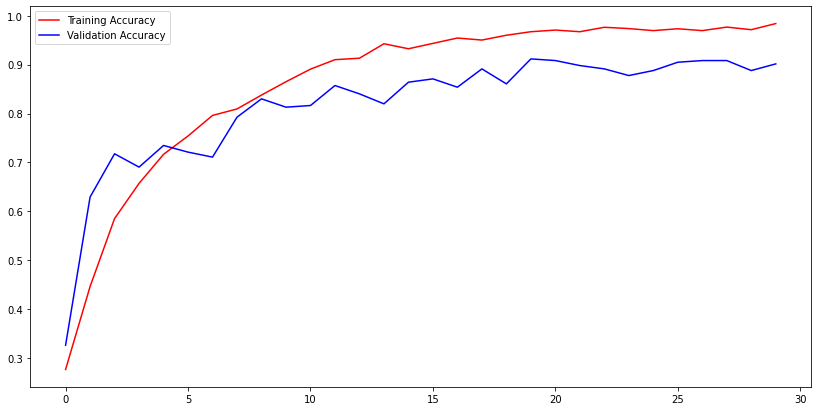

In [117]:
#model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

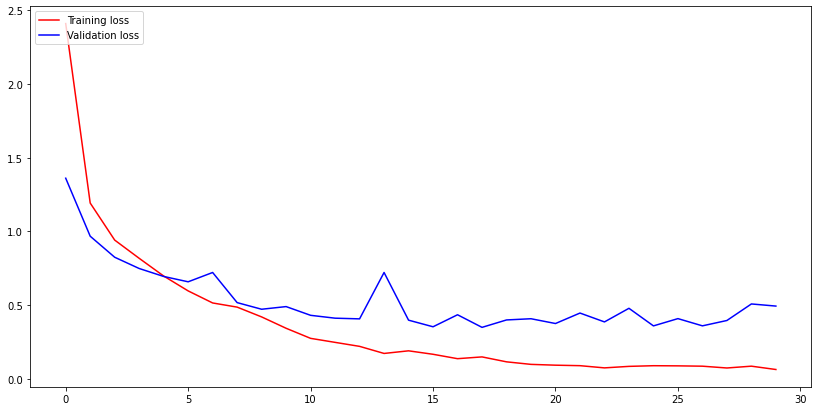

In [118]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

Prediction

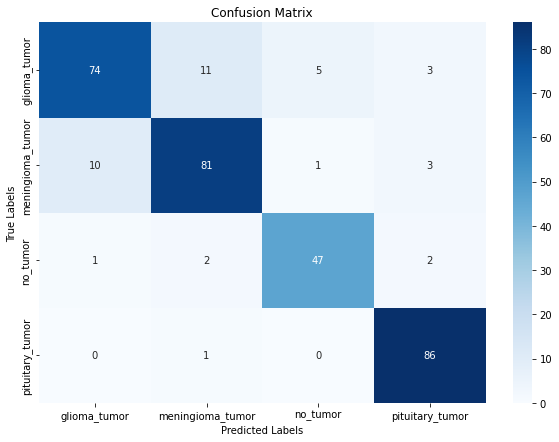

In [119]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [120]:
folder_path = '/kaggle/input/brain-tumor-classification-mri'  # Replace with your folder path
image_size = 150
image_arrays, file_paths = process_images_in_folder(folder_path, image_size)


In [121]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

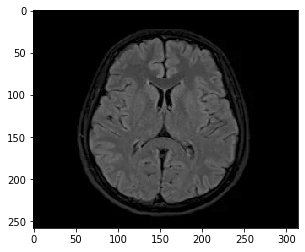

In [122]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor/image(100).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [123]:
overall_accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Overall Accuracy: {overall_accuracy}")

# Calculate per-class accuracy
cm = confusion_matrix(y_true_classes, y_pred_classes)  # Get confusion matrix

# Loop through each class
for i, class_label in enumerate(labels):
    # Get true positive, false positive, and total for the class
    tp = cm[i, i]  # True positives are on the diagonal
    fp = sum(cm[:, i]) - tp  # False positives are in the column
    total = sum(cm[i, :])  # Total instances of the class

    # Calculate and print accuracy for the class
    if total > 0:
        class_accuracy = tp / total  
        print(f"Accuracy for {class_label}: {class_accuracy:.4f}")
    else:
        print(f"No instances of {class_label} found in the test set.")

Overall Accuracy: 0.8807339449541285
Accuracy for glioma_tumor: 0.7957
Accuracy for meningioma_tumor: 0.8526
Accuracy for no_tumor: 0.9038
Accuracy for pituitary_tumor: 0.9885


In [124]:

# Specify the folder containing images to predict
folder_path = '/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor'  # Replace with your folder path

In [125]:
for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Process only image files
        image_path = os.path.join(folder_path, filename)
        predicted_label, predicted_prob = predict_brain_tumor_type(image_path)

        print(f"Image: {filename}")
        print(f"Predicted Class: {predicted_label}")
        print(f"Predicted Probability: {predicted_prob:.4f}")
        print("-" * 20)  # Separator

Image: image(84).jpg
Predicted Class: meningioma_tumor
Predicted Probability: 0.9975
--------------------
Image: image(44).jpg
Predicted Class: meningioma_tumor
Predicted Probability: 0.9836
--------------------
Image: image(29).jpg
Predicted Class: meningioma_tumor
Predicted Probability: 0.9857
--------------------
Image: image(52).jpg
Predicted Class: meningioma_tumor
Predicted Probability: 1.0000
--------------------
Image: image(33).jpg
Predicted Class: meningioma_tumor
Predicted Probability: 1.0000
--------------------
Image: image(106).jpg
Predicted Class: meningioma_tumor
Predicted Probability: 0.9998
--------------------
Image: image(69).jpg
Predicted Class: meningioma_tumor
Predicted Probability: 1.0000
--------------------
Image: image(21).jpg
Predicted Class: meningioma_tumor
Predicted Probability: 0.9999
--------------------
Image: image(74).jpg
Predicted Class: meningioma_tumor
Predicted Probability: 0.9999
--------------------
Image: image(35).jpg
Predicted Class: meningi